In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize, rescale
from lantern_fiber_utils import LanternFiber

In [2]:
# For 19 mode:
n_core = 1.44
n_cladding = 1.4345
wavelength = 1.5 # microns
core_radius = 32.8/2 # microns

# Scale parameters
max_r = 2 # Maximum radius to calculate mode field, where r=1 is the core diameter
npix = 200 # Half-width of mode field calculation in pixels
show_plots = True

# Input fields
inp_pix_scale = 4 # input pixels / fiber-field pixels
datapath = './'
input_filename = 'sim_seeing-psf_roughHbandSCExAO.npy'

plot_modefields = True
save_image_sequences = False
imseq_out_dir = datapath+'imseq/'

Total number of unique modes found: 19


/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:207: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:222: RuntimeWarning: invalid value encountered in divide
  field_sin = field_sin / np.sqrt(np.sum(field_sin**2))
/home/dani/DaniProjects/SAIL/PhotonicLanternProjects/PLImageReconstruction/Utils/lantern_fiber_utils.py:224: RuntimeWarning: invalid value encountered in divide
  field_sin_cart = field_sin_cart / np.sqrt(np.sum(field_sin_cart**2))


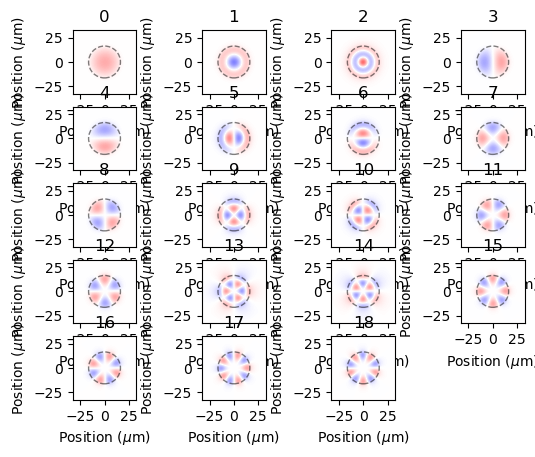

In [3]:
### Make the fiber and modes
f = LanternFiber(n_core, 
                 n_cladding, 
                 core_radius, 
                 wavelength)
f.find_fiber_modes()
f.make_fiber_modes(npix=npix, show_plots=False, max_r=max_r)
modes_to_measure = np.arange(f.nmodes)

# Plot all mode fields
if plot_modefields:
    plt.figure(3)
    plt.clf()
    nplots = len(f.allmodefields_rsoftorder) #7
    zlim = 0.03
    for k in range(nplots):
        plt.subplot(5,4,k+1)
        sz = f.max_r * f.core_radius
        plt.imshow(f.allmodefields_rsoftorder[k], extent=(-sz, sz, -sz, sz), cmap='bwr',
                   vmin=-zlim, vmax=zlim)
        plt.xlabel('Position ($\mu$m)')
        plt.ylabel('Position ($\mu$m)')
        core_circle = plt.Circle((0,0), f.core_radius, color='k', fill=False, linestyle='--', alpha=0.5)
        plt.gca().add_patch(core_circle)
        plt.title(k)

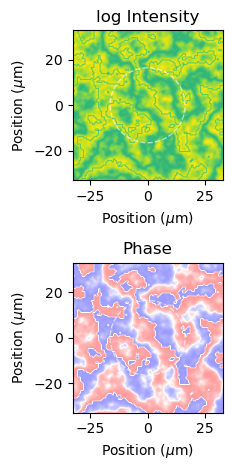

Injection efficiency for mode 0: 0.046813
Injection efficiency for mode 1: 0.013128
Injection efficiency for mode 2: 0.016315
Injection efficiency for mode 3: 0.001389
Injection efficiency for mode 4: 0.002390
Injection efficiency for mode 5: 0.005770
Injection efficiency for mode 6: 0.000203
Injection efficiency for mode 7: 0.000057
Injection efficiency for mode 8: 0.000543
Injection efficiency for mode 9: 0.006653
Injection efficiency for mode 10: 0.001543
Injection efficiency for mode 11: 0.000003
Injection efficiency for mode 12: 0.006433
Injection efficiency for mode 13: 0.000474
Injection efficiency for mode 14: 0.003950
Injection efficiency for mode 15: 0.001022
Injection efficiency for mode 16: 0.002643
Injection efficiency for mode 17: 0.000235
Injection efficiency for mode 18: 0.000396
Total power in input field: 617940.578407
Injection efficiency: 0.109958
Coupled power: 67947.510376


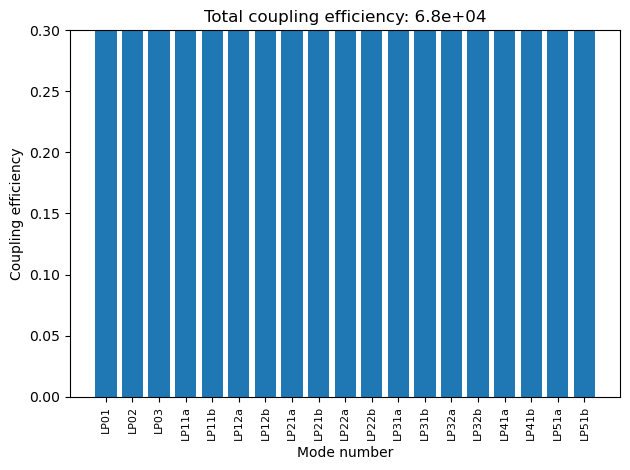

In [6]:
# Get input fields
input_cube = np.load('complex_wavefronts.npy')
n_flds = input_cube.shape[0]
n_flds = 1 ## For testing - just show first one


for k in range(n_flds):
    orig_field = input_cube[4,:,:]
    resized_field_real = rescale(orig_field.real, inp_pix_scale)
    resized_field_imag = rescale(orig_field.imag, inp_pix_scale)
    resized_field = resized_field_real + resized_field_imag*1j

    input_field = resized_field
    cnt = input_field.shape[1]//2
    input_field = input_field[cnt-f.npix:cnt+f.npix, cnt-f.npix:cnt+f.npix]

    f.input_field = input_field
    f.plot_injection_field(f.input_field, show_colorbar=False, logI=True, vmin=-3)
    plt.pause(0.001)

    if save_image_sequences:
        fname = imseq_out_dir + 'injplot_%.3d' % k + '.png'
        plt.savefig(fname, bbox_inches='tight', dpi=200)

    coupling, mode_coupling, mode_coupling_complex = f.calc_injection_multi(mode_field_numbers=modes_to_measure,
                                                     verbose=True, show_plots=True, fignum=2, complex=True, ylim=0.3,
                                                     return_abspower=True)
    ### The complex LP mode coefficients are in mode_coupling_complex.
    if save_image_sequences:
        fname = imseq_out_dir + 'modeplot_%.3d' % k + '.png'
        plt.savefig(fname, bbox_inches='tight', dpi=200)
    plt.pause(0.5)

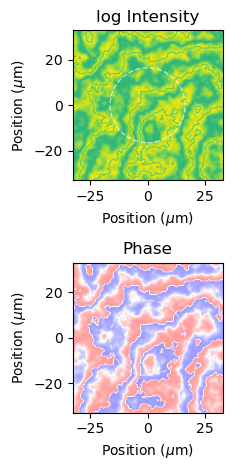

Injection efficiency for mode 0: 0.050766
Injection efficiency for mode 1: 0.013478
Injection efficiency for mode 2: 0.021106
Injection efficiency for mode 3: 0.001090
Injection efficiency for mode 4: 0.001106
Injection efficiency for mode 5: 0.005375
Injection efficiency for mode 6: 0.000482
Injection efficiency for mode 7: 0.002121
Injection efficiency for mode 8: 0.000712
Injection efficiency for mode 9: 0.000018
Injection efficiency for mode 10: 0.002343
Injection efficiency for mode 11: 0.009957
Injection efficiency for mode 12: 0.001375
Injection efficiency for mode 13: 0.001295
Injection efficiency for mode 14: 0.000041
Injection efficiency for mode 15: 0.000525
Injection efficiency for mode 16: 0.000307
Injection efficiency for mode 17: 0.003017
Injection efficiency for mode 18: 0.001726
Total power in input field: 567385.102656
Injection efficiency: 0.116839
Coupled power: 66292.548815


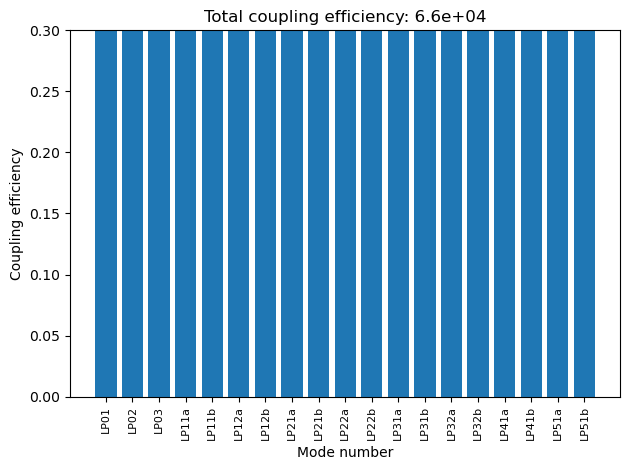

In [7]:
# Get input fields
input_cube = np.load('complex_wavefronts.npy')
n_flds = input_cube.shape[0]
n_flds = 1 ## For testing - just show first one


for k in range(n_flds):
    orig_field = input_cube[3,:,:]
    resized_field_real = rescale(orig_field.real, inp_pix_scale)
    resized_field_imag = rescale(orig_field.imag, inp_pix_scale)
    resized_field = resized_field_real + resized_field_imag*1j

    input_field = resized_field
    cnt = input_field.shape[1]//2
    input_field = input_field[cnt-f.npix:cnt+f.npix, cnt-f.npix:cnt+f.npix]

    f.input_field = input_field
    f.plot_injection_field(f.input_field, show_colorbar=False, logI=True, vmin=-3)
    plt.pause(0.001)

    if save_image_sequences:
        fname = imseq_out_dir + 'injplot_%.3d' % k + '.png'
        plt.savefig(fname, bbox_inches='tight', dpi=200)

    coupling, mode_coupling, mode_coupling_complex = f.calc_injection_multi(mode_field_numbers=modes_to_measure,
                                                     verbose=True, show_plots=True, fignum=2, complex=True, ylim=0.3,
                                                     return_abspower=True)
    ### The complex LP mode coefficients are in mode_coupling_complex.
    if save_image_sequences:
        fname = imseq_out_dir + 'modeplot_%.3d' % k + '.png'
        plt.savefig(fname, bbox_inches='tight', dpi=200)
    plt.pause(0.5)